This notebook reproduces 

> **Fig 11**: Stark states of $n=30$ and 31 states of Ps, with $m=2$ (grey dashed) and $m=29$ (black). In the $n=30$ level, the $m=29$ state is a circular state and experiences no first-order Stark shift and only a very weak second-order shift, as explained in the text.

from the article

> #### Prospects for Studies of the Free Fall and Gravitational Quantum States of Antimatter
>
> G. Dufour, D. B. Cassidy, P. Crivelli, P. Debu, A. Lambrecht, V. V. Nesvizhevsky, S. Reynaud, A. Yu. Voronin, and T. E. Wall.
>
> *Adv. High En. Phys.*, **2015**, 379642 (2015) [DOI:10.1155/2015/379642](https://dx.doi.org/10.1155/2015/379642)

This article uses an $|\, n \, l \, m_l \, \rangle$ basis and plots the Stark structure for $m_l=2$ and $m_l=29$.

The calculation below uses an $|\, n \, l \, S \, J \, M_J \, \rangle$ basis with $S=0$ and plots Stark structure for $M_J = 2$ and $M_J=29$.

In [1]:
# packages
import os
from functools import reduce
from hsfs import Hamiltonian, En_h, h, c, constants_info, mu_me, get_qd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['axes.formatter.useoffset'] = False

# Parallel fields, $n=20-21$

In [2]:
# construct matrix
n_min = 10
n_max = 11
S = None
mat0 = Hamiltonian(n_min=n_min, n_max=n_max, S=S, MJ_max=None)
print('Number of basis states:', '%d'%mat0.num_states)

Number of basis states: 884


In [10]:
# calculate Stark map
Bfield=0.1
Efield_vec=[0.0,0.0,1.0]
Efield = np.linspace(1.2*10**4, 1.7*10**4, 31) # V /cm
sm0 = mat0.stark_map(Efield*1e2, Bfield=Bfield, 
                     Efield_vec=Efield_vec, 
                     singlet_triplet_coupling=False,
                     cache_matrices=True,
                     load_matrices=True,
                     save_matrices=True,
                     matrices_dir='./saved_matrices/')
sm1 = mat0.stark_map(Efield*1e2, Bfield=Bfield, 
                     Efield_vec=Efield_vec, 
                     singlet_triplet_coupling=True,
                     cache_matrices=True,
                     load_matrices=True,
                     save_matrices=True,
                     matrices_dir='./saved_matrices/')

diagonalise Hamiltonian:   3%|▎         | 1/31 [00:00<00:05,  5.31it/s]

Field orientation: parallel
Using cached Zeeman matrix
Using cached Stark matrix


diagonalise Hamiltonian:   3%|▎         | 1/31 [00:00<00:03,  9.83it/s]

Field orientation: parallel
Using cached Zeeman matrix
Using cached Singlet-Triplet matrix
Using cached Stark matrix


diagonalise Hamiltonian: 100%|██████████| 31/31 [00:03<00:00,  9.86it/s]


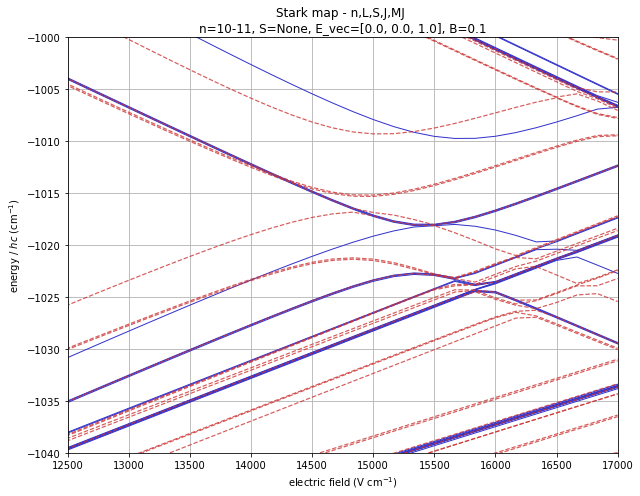

In [12]:
fig, ax = plt.subplots(figsize=(9, 7))

indexes = range(mat0.num_states)
for ix in indexes:
    ax.plot(Efield, sm0[:, ix] / (100*h*c*mu_me), ls='-', lw=1.0, alpha=1, c=(0.2, 0.2, 0.8))

indexes = range(mat0.num_states)
for ix in indexes:
    ax.plot(Efield, sm1[:, ix] / (100*h*c*mu_me), ls='--', lw=1.2, alpha=0.8, c=(0.8, 0.2, 0.2))

# format
ax.set_xlabel('electric field (V cm$^{-1}$)')
ax.set_ylabel('energy / $h c$ (cm$^{-1}$)')
ax.set_xlim(12500, 17000)
ax.set_ylim(-1040, -1000)

# output
plt.grid()
plt.title('Stark map - n,L,S,J,MJ \n' + \
          'n='+str(n_min)+'-'+str(n_max)+ ', ' + \
          'S=' + str(S) + ', ' + \
          'E_vec='+str(Efield_vec) + ', ' + \
          'B='+str(Bfield))
plt.tight_layout()

# Parallel fields, $n=5-6$

In [18]:
# construct matrix
n_min = 5
n_max = 6
S = None
mat0 = Hamiltonian(n_min=n_min, n_max=n_max, S=S, MJ_max=None)
print('Number of basis states:', '%d'%mat0.num_states)

Number of basis states: 244


In [25]:
# calculate Stark map
Bfield=00.0
Efield_vec=[0.0,0.0,1.0]
Efield = np.linspace(3.0*10**5, 6.0*10**5, 501) # V /cm
sm0 = mat0.stark_map(Efield*1e2, Bfield=Bfield, 
                     Efield_vec=Efield_vec, 
                     singlet_triplet_coupling=False,
                     cache_matrices=True,
                     load_matrices=True,
                     save_matrices=True,
                     matrices_dir='./saved_matrices/')
sm1 = mat0.stark_map(Efield*1e2, Bfield=Bfield, 
                     Efield_vec=Efield_vec, 
                     singlet_triplet_coupling=True,
                     cache_matrices=True,
                     load_matrices=True,
                     save_matrices=True,
                     matrices_dir='./saved_matrices/')

diagonalise Hamiltonian:   2%|▏         | 10/501 [00:00<00:07, 69.97it/s]

Field orientation: parallel
Using cached Stark matrix


diagonalise Hamiltonian:   6%|▌         | 28/501 [00:00<00:01, 272.16it/s]

Field orientation: parallel
Using cached Singlet-Triplet matrix
Using cached Stark matrix


diagonalise Hamiltonian: 100%|██████████| 501/501 [00:01<00:00, 289.14it/s]


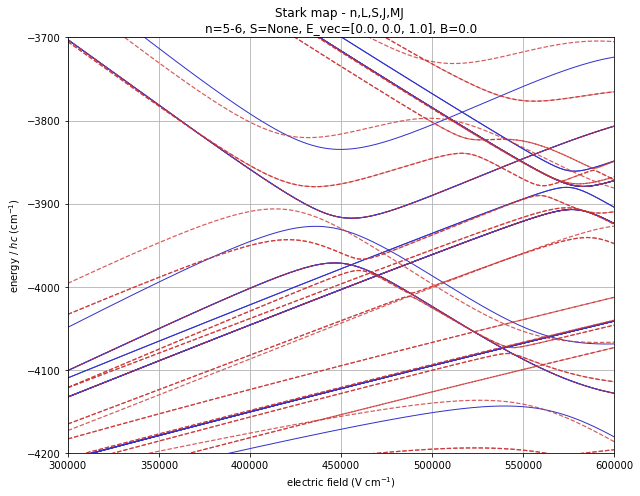

In [26]:
fig, ax = plt.subplots(figsize=(9, 7))

indexes = range(mat0.num_states)
for ix in indexes:
    ax.plot(Efield, sm0[:, ix] / (100*h*c*mu_me), ls='-', lw=1.0, alpha=1, c=(0.2, 0.2, 0.8))

indexes = range(mat0.num_states)
for ix in indexes:
    ax.plot(Efield, sm1[:, ix] / (100*h*c*mu_me), ls='--', lw=1.2, alpha=0.8, c=(0.8, 0.2, 0.2))

# format
ax.set_xlabel('electric field (V cm$^{-1}$)')
ax.set_ylabel('energy / $h c$ (cm$^{-1}$)')
ax.set_xlim(300000, 600000)
ax.set_ylim(-4200, -3700)

#ax.set_xlim(0, 100000)
#ax.set_ylim(-3500, -2700)

# output
plt.grid()
plt.title('Stark map - n,L,S,J,MJ \n' + \
          'n='+str(n_min)+'-'+str(n_max)+ ', ' + \
          'S=' + str(S) + ', ' + \
          'E_vec='+str(Efield_vec) + ', ' + \
          'B='+str(Bfield))
plt.tight_layout()

In [15]:
constants_info()

,Constant,Value
0,"speed of light in vacuum, $c$",299792458
1,"Planks constant, $h$",6.62607004e-34
2,"Reduced Planks constant, $\hbar$",1.0545718e-34
3,"Rydberg constant, $R_{\infty}$",10973731.568508
4,"electron charge, $e$",1.6021766208e-19
5,fine structure constant,0.0072973525664
6,atomic mass,1.66053904e-27
7,Hatree energy,4.3597446510117e-18
8,"Bohr radius, $a_0$",5.2917721048e-11
9,"Bohr magneton, $\mu_B$",9.2740099908307e-24
